In [30]:
import pandas as pd 

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import RobustScaler

from matplotlib.pyplot import figure

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [2]:
df=pd.read_csv('FINAL_USO.csv',index_col='Date',parse_dates=True)
df

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,124.169998,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,119.570000,120.139999,119.570000,120.019997,120.019997,9736400,239.039993,240.839996,234.270004,234.339996,...,20.650000,21.090000,21.090000,60507000,9.490000,9.520000,9.280000,9.290000,9.290000,21598200
2018-12-26,120.620003,121.000000,119.570000,119.660004,119.660004,14293500,235.970001,246.179993,233.759995,246.179993,...,20.530001,20.620001,20.620001,76365200,9.250000,9.920000,9.230000,9.900000,9.900000,40978800
2018-12-27,120.570000,120.900002,120.139999,120.570000,120.570000,11874400,242.570007,248.289993,238.960007,248.070007,...,20.700001,20.969999,20.969999,52393000,9.590000,9.650000,9.370000,9.620000,9.620000,36578700


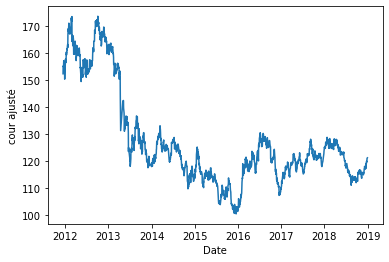

In [3]:
plt.xlabel('Date')
plt.ylabel('cour ajusté')
plt.plot(df['Adj Close']);

# VERIFICATION DE LA STATIONNALITE

Avant de pouvoir construire un modèle ARIMA, nous devons nous assurer que la série temporelle est stationnaire. Il y a deux façons principales de le faire :



-    Statistiques roulantes : Tracer la moyenne mobile et l’écart-type mobile. La série temporelle est stationnaire si elle reste constante dans le temps (à l’œil nu, regardez si les lignes sont droites et parallèles à l’axe des x)


-    Test de Dickey-Fuller augmenté (ADF) : La série temporelle est considérée comme stationnaire si la valeur p est faible (selon l’hypothèse nulle) et si les valeurs critiques à des intervalles de confiance de 1%, 5%, 10% sont aussi proches que possible des statistiques de l’ADF (Augmented Dickey-Fuller)

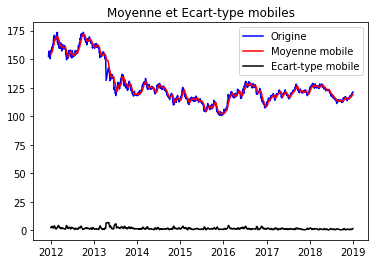

In [4]:
rolling_mean = df['Adj Close'].rolling(window = 12).mean()
rolling_std = df['Adj Close'].rolling(window = 12).std()
plt.plot( df['Adj Close'], color = 'blue', label = 'Origine')
plt.plot(rolling_mean, color = 'red', label = 'Moyenne mobile')
plt.plot(rolling_std, color = 'black', label = 'Ecart-type mobile')
plt.legend(loc = 'best')
plt.title('Moyenne et Ecart-type mobiles')
plt.show()

In [5]:
result = adfuller(df['Adj Close'])
 
print('Statistiques ADF : {}'.format(result[0]))
print('p-value : {}'.format(result[1]))
print('Valeurs Critiques :')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Statistiques ADF : -1.8234601291067782
p-value : 0.3688781538232954
Valeurs Critiques :
	1%: -3.434166497101742
	5%: -2.8632257697922383
	10%: -2.5676674574279645


In [6]:
#   CREATION DE FONCTION PERMETTANT DE VERIFIER LA STATIONNALITE D'UNE SERIE TEMPORELLE

def get_stationarity(timeseries):
    
    # Statistiques mobiles
    
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # tracé statistiques mobiles
    
    original = plt.plot(timeseries, color='blue', label='Origine')
    mean = plt.plot(rolling_mean, color='red', label='Moyenne Mobile')
    std = plt.plot(rolling_std, color='black', label='Ecart-type Mobile')
    plt.legend(loc='best')
    plt.title('Moyenne et écart-type Mobiles')
    plt.show(block=False)
    
    # Test Dickey–Fuller :
    
    result = adfuller(timeseries)
    print('Statistiques ADF : {}'.format(result[0]))
    print('p-value : {}'.format(result[1]))
    print('Valeurs Critiques :')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

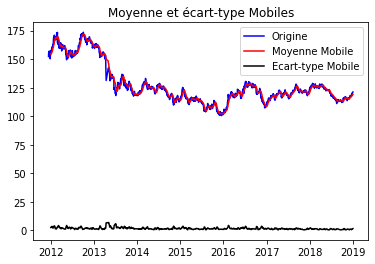

Statistiques ADF : -1.8234601291067782
p-value : 0.3688781538232954
Valeurs Critiques :
	1%: -3.434166497101742
	5%: -2.8632257697922383
	10%: -2.5676674574279645


In [7]:
get_stationarity(df['Adj Close'])

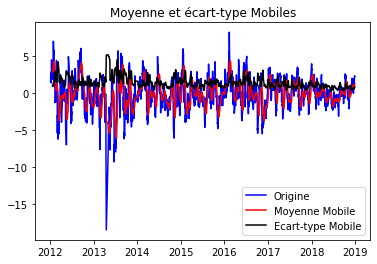

Statistiques ADF : -11.327702493871856
p-value : 1.1327216749713051e-20
Valeurs Critiques :
	1%: -3.4342047424645092
	5%: -2.8632426521042587
	10%: -2.5676764469249473


In [8]:
rolling_mean = df['Adj Close'].rolling(window=12).mean()
df_minus_mean = df['Adj Close']- rolling_mean
df_minus_mean.dropna(inplace=True)
get_stationarity(df_minus_mean)

- L’application de la décroissance exponentielle

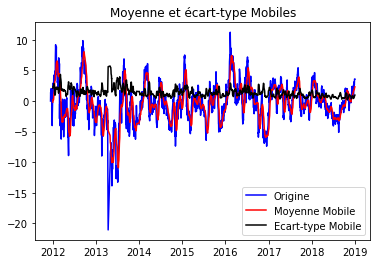

Statistiques ADF : -7.122013720355908
p-value : 3.7015401231595003e-10
Valeurs Critiques :
	1%: -3.434166497101742
	5%: -2.8632257697922383
	10%: -2.5676674574279645


In [9]:
rolling_mean_exp_decay =df['Adj Close'].ewm(halflife=12, min_periods=0, adjust=True).mean()
df_exp_decay =df['Adj Close'] - rolling_mean_exp_decay
df_exp_decay.dropna(inplace=True)
get_stationarity(df_exp_decay)

-  Décalage temporel

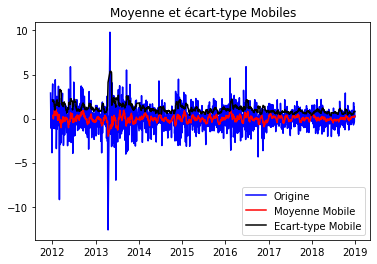

Statistiques ADF : -31.123953762522586
p-value : 0.0
Valeurs Critiques :
	1%: -3.434168725808674
	5%: -2.8632267535965252
	10%: -2.567667981283309


In [10]:
df_shift = df['Adj Close'] - df['Adj Close'].shift()
df_shift.dropna(inplace=True)
get_stationarity(df_shift)

Trois entiers (p, d, q) sont généralement utilisés pour paramétrer les modèles ARIMA :

- p : nombre de termes autorégressifs (ordre AR)
- d : nombre de différences non saisonnières (ordre de différenciation)
- q : nombre de termes moyens mobiles (ordre MA)

1.  Fonction d’Auto-Corrélation (ACF)

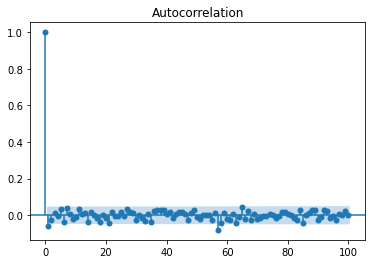

In [15]:
acf_plot = plot_acf(df_shift, lags=100)

  2. Fonction d’Auto-Corrélation Partielle(PACF)

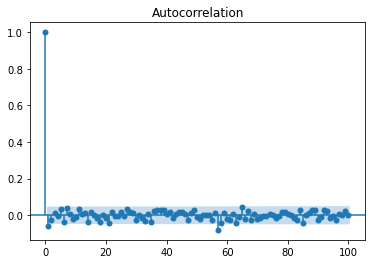

In [16]:
pacf_plot = plot_acf(df_shift, lags=100)


In [ ]:
# Modelisation

In [27]:
from statsmodels.tsa.arima_model import ARIMA

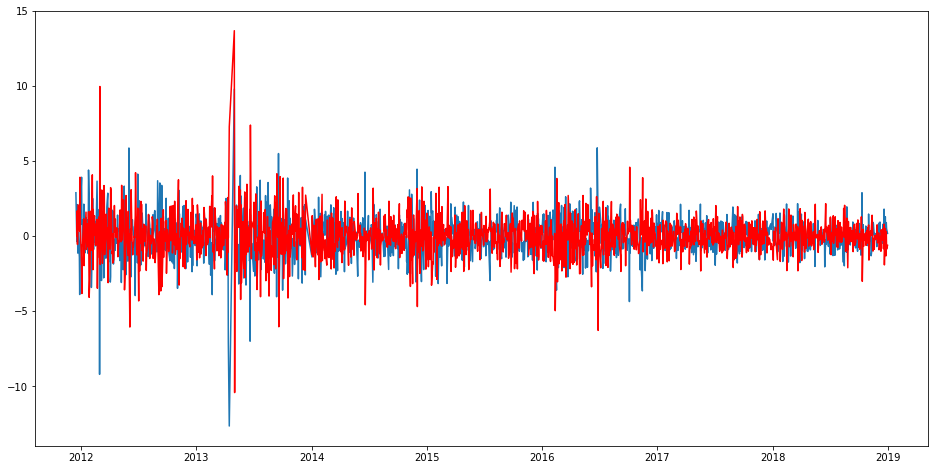

In [31]:
plt.figure(figsize=(16,8))
model=ARIMA(df_shift, order=(2,1,2))
results_ARIMA=model.fit(disp=-1)
plt.plot(df_shift)
plt.plot(results_ARIMA.fittedvalues, color= 'red')

In [12]:
data = pd.read_csv('airline_passengers.csv', parse_dates = ['Month'], index_col = ['Month'])

In [13]:
data

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461
